# Projet Final R

Victor Simonin & Alexandre Lemonnier

Dataset : `decathlon.csv`

---

## Import des bibliothèques

Pour commencer il est nécessaire d'importer les bibliothèques qui nous permettront d'utiliser leurs fonctions par la suite du projet

In [38]:
library("VIM") # Pour la visualisation des valeurs manquantes
library("corrplot") # Pour les matrices de corrélation.
library("factoextra") # Pour les graphes de l'ACP
library("FactoMineR")
library("PerformanceAnalytics") # Diagramme de dispersion
library("pander") # Pour la régression logistique

---

## Lecture du dataset

In [39]:
df = read.table('data/decathlon.csv',header = T ,sep = ';', dec = '.', row.names = 1)
head(df)

,X100m,Longueur,Poids,Hauteur,X400m,X110m.H,Disque,Perche,Javelot,X1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,JO
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,JO
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54,6,8287,JO


Le dataset ci-dessus est composé de plusieurs données assez différentes. Celles-ci représentent les scores obtenues par des athlètes de l'épreuve du decathlon au Jeux Olympiques, donc les scores des 10 épreuves ainsi que leur classement et leurs points.

---

## Visualisation des données manquantes

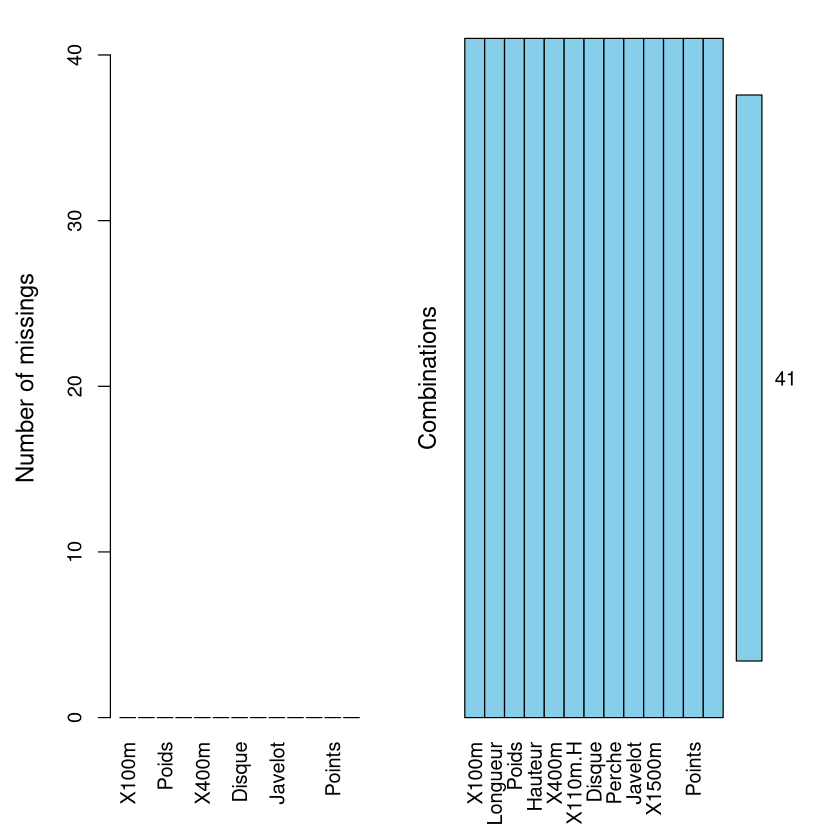

In [40]:
missdata = aggr(df, prop = F, number = T)

On peut voir ici que notre dataset ne semble pas contenir de données manquantes, ce qui facilite notre analyse et nous permet de continuer sereinement. Deux choix étaient possibles si jamais le dataset contenait des données manquantes, soit la suppression des lignes qui ne sont pas complètes, ou alors il est possible d'inférer ces données manquantes par plusieurs algorithmes.

Il faudra néanmoins vérifier qu’il n’y a aucune valeures aberrantes.

## Description du dataset

Cette section va nous servir à comprendre un peu mieux notre dataset, notamment sur sa taille, ses attributs et quelques statistiques descriptives sur les colonnes. 

En premier lieu, nous allons passer la colonne `Competition` qui est une colonne catégorique en colonne numérique.

In [41]:
table(df$Competition)
competition = df$competition


Decastar       JO 
      13       28 

On peut voir ici que notre dataset contient les résultats de deux compétitions, les `JO` et le `Decastar`, on va donc simplement remplacer ces deux valeurs par des valeurs numériques en suivant : `JO` = 1 et `Decastar` = 2.

In [42]:
df[1:28, 13] = 1
df[29:41, 13] = 2
df$Competition = as.numeric(as.character(df$Competition))

In [43]:
df

,X100m,Longueur,Poids,Hauteur,X400m,X110m.H,Disque,Perche,Javelot,X1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,1
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,1
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.60,55.54,278.11,3,8725,1
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.40,58.46,265.42,4,8414,1
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.90,55.39,278.05,5,8343,1
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,6,8287,1
Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.80,57.76,264.35,7,8237,1
Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,1
Bernard,10.69,7.48,14.80,2.12,49.13,14.17,44.75,4.40,55.27,276.31,9,8225,1


Nos compétitions ont bien été modifié, ainsi que le type de la colonne, on a donc maintenant que des colonnes numériques dans notre dataset.

In [44]:
dim(df)

[1] 41 13

On comprend donc ici que notre dataset se compose de 41 individus qui ont chacun 13 données dans les colonnes qui servent à les qualifier et à les décrire.

In [45]:
attributes(df)

$names
 [1] "X100m"       "Longueur"    "Poids"       "Hauteur"     "X400m"      
 [6] "X110m.H"     "Disque"      "Perche"      "Javelot"     "X1500m"     
[11] "Classement"  "Points"      "Competition"

$row.names
 [1] "Sebrle"      "Clay"        "Karpov"      "Macey"       "Warners"    
 [6] "Zsivoczky"   "Hernu"       "Nool"        "Bernard"     "Schwarzl"   
[11] "Pogorelov"   "Schoenbeck"  "Barras"      "Smith"       "Averyanov"  
[16] "Ojaniemi"    "Smirnov"     "Qi"          "Drews"       "Parkhomenko"
[21] "Terek"       "Gomez"       "Turi"        "Lorenzo"     "Karlivans"  
[26] "Korkizoglou" "Uldal"       "Casarsa"     "SEBRLE"      "CLAY"       
[31] "KARPOV"      "BERNARD"     "YURKOV"      "WARNERS"     "ZSIVOCZKY"  
[36] "McMULLEN"    "MARTINEAU"   "HERNU"       "BARRAS"      "NOOL"       
[41] "BOURGUIGNON"

$class
[1] "data.frame"

On retrouve donc les différents attributs de notre dataset avec les noms des différentes colonnes qui représentent les épreuves des **Jeux Olympiques** et du **Decastar**. \
Les lignes représentent les individus et donc les scores des athletes participant à ces compétitions.

In [46]:
summary(df)

     X100m          Longueur        Poids          Hauteur          X400m      
 Min.   :10.44   Min.   :6.61   Min.   :12.68   Min.   :1.850   Min.   :46.81  
 1st Qu.:10.85   1st Qu.:7.03   1st Qu.:13.88   1st Qu.:1.920   1st Qu.:48.93  
 Median :10.98   Median :7.30   Median :14.57   Median :1.950   Median :49.40  
 Mean   :11.00   Mean   :7.26   Mean   :14.48   Mean   :1.977   Mean   :49.62  
 3rd Qu.:11.14   3rd Qu.:7.48   3rd Qu.:14.97   3rd Qu.:2.040   3rd Qu.:50.30  
 Max.   :11.64   Max.   :7.96   Max.   :16.36   Max.   :2.150   Max.   :53.20  
    X110m.H          Disque          Perche         Javelot     
 Min.   :13.97   Min.   :37.92   Min.   :4.200   Min.   :50.31  
 1st Qu.:14.21   1st Qu.:41.90   1st Qu.:4.500   1st Qu.:55.27  
 Median :14.48   Median :44.41   Median :4.800   Median :58.36  
 Mean   :14.61   Mean   :44.33   Mean   :4.762   Mean   :58.32  
 3rd Qu.:14.98   3rd Qu.:46.07   3rd Qu.:4.920   3rd Qu.:60.89  
 Max.   :15.67   Max.   :51.65   Max.   :5.400   M

La commande `summary` nous permet d'afficher quelques informations statistiques intéressantes sur nos données.

On retrouve les calculs suivant :
- Minimum
- 1er quartil
- Médiane
- Moyenne
- 3eme quartil
- Maximum

Cela nous permet de comprendre un peu mieux notre dataset, et aussi de commencer à repérer certains outliers et valeurs aberrantes. \
Ici les colonnes avec les valeurs les plus dispersés sont le **javelot** et le **1500m**.\
Les statistiques sur le classement et la compétition ne sont pas intéressantes.

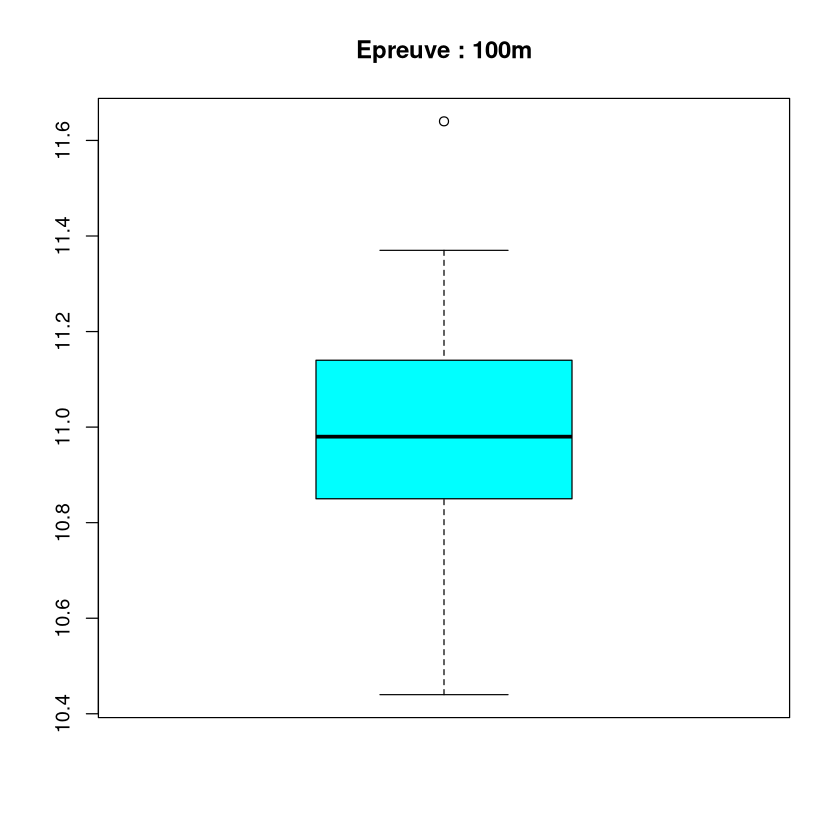

In [47]:
boxplot(df$X100m, col ='cyan', main = "Epreuve : 100m")

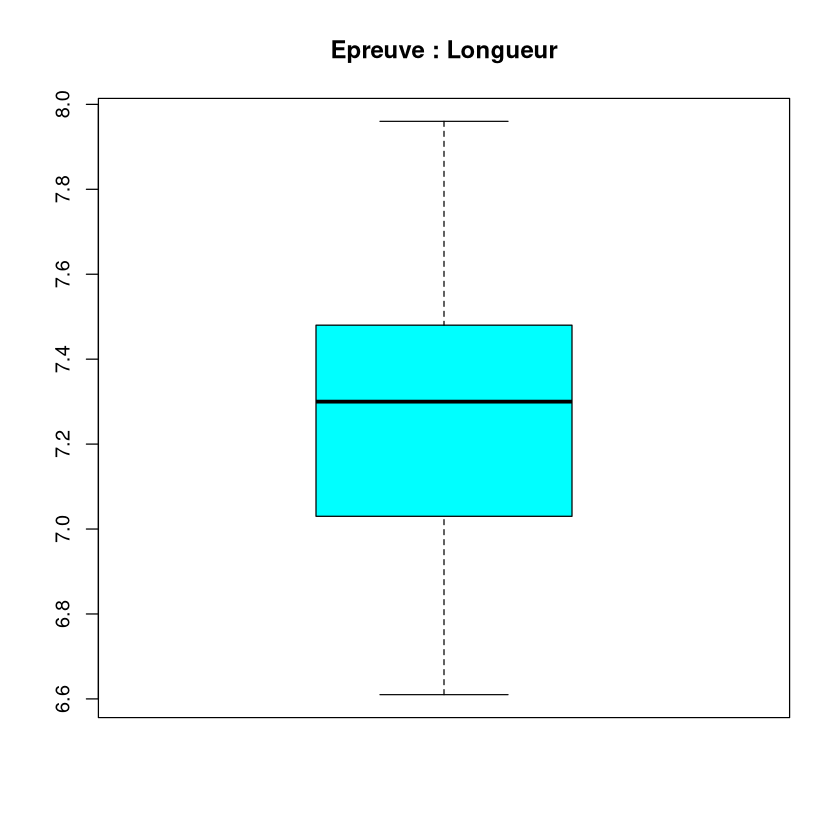

In [48]:
boxplot(df$Longueur, col ='cyan', main = "Epreuve : Longueur")

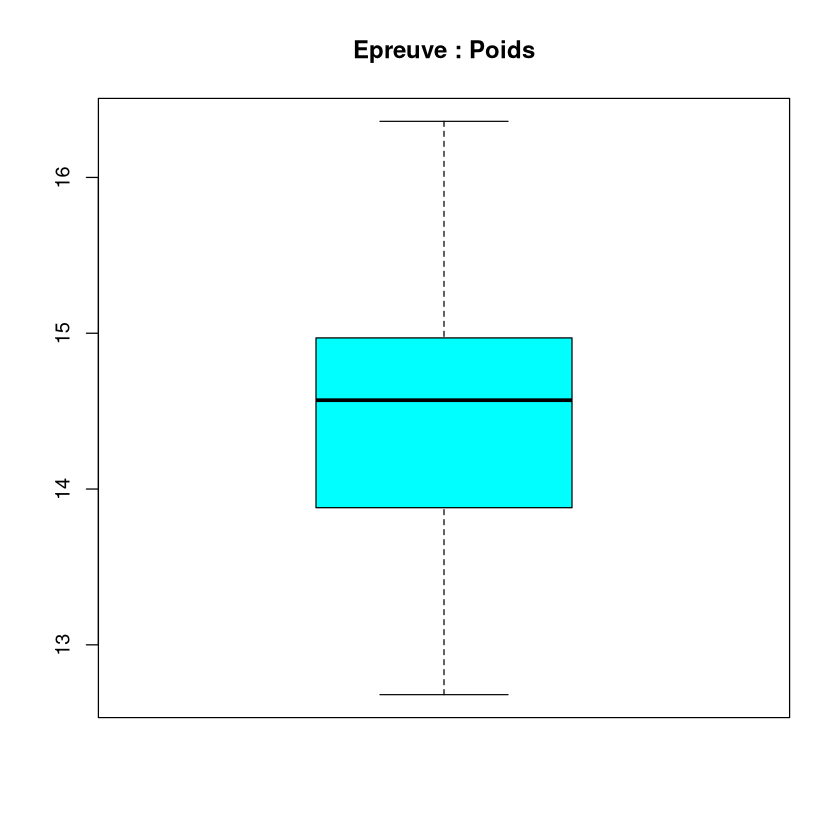

In [49]:
boxplot(df$Poids, col ='cyan', main = "Epreuve : Poids")

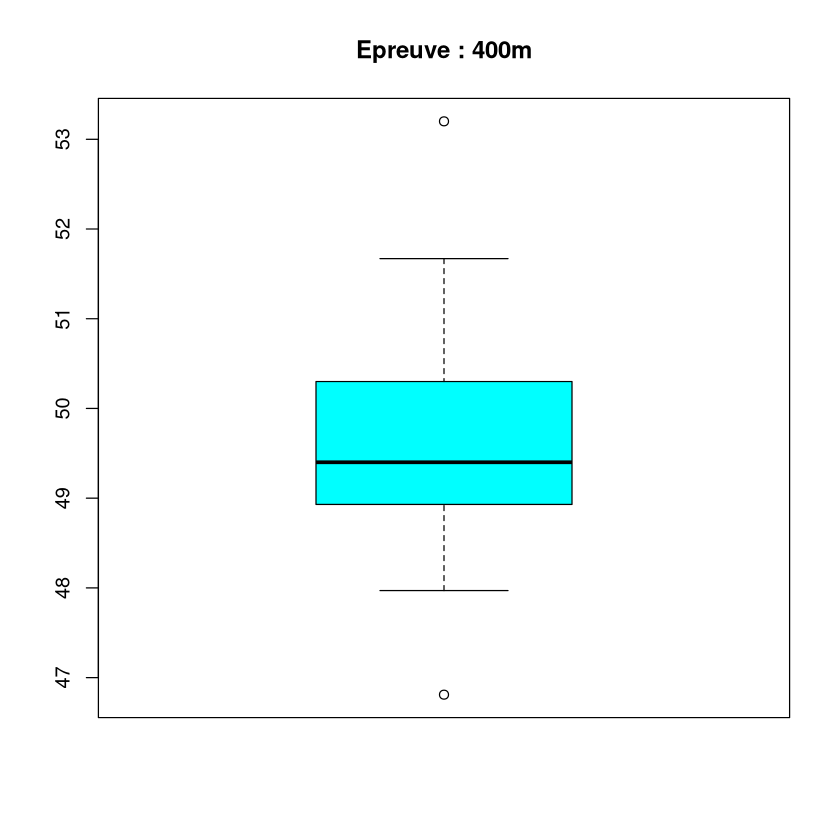

In [50]:
boxplot(df$X400m, col ='cyan', main = "Epreuve : 400m")

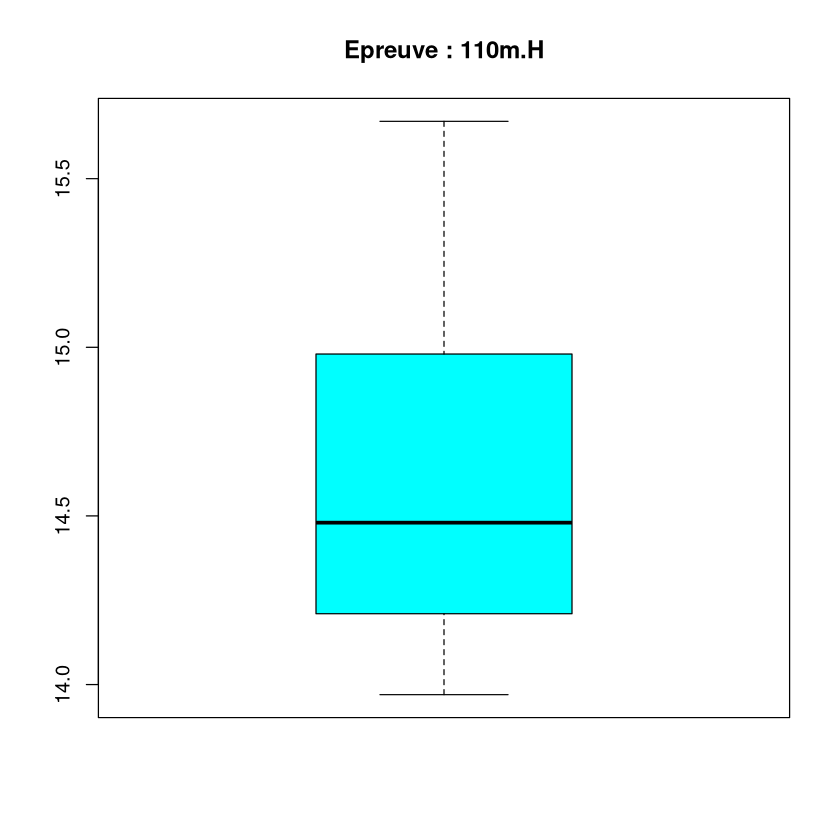

In [51]:
boxplot(df$X110m.H, col ='cyan', main = "Epreuve : 110m.H")

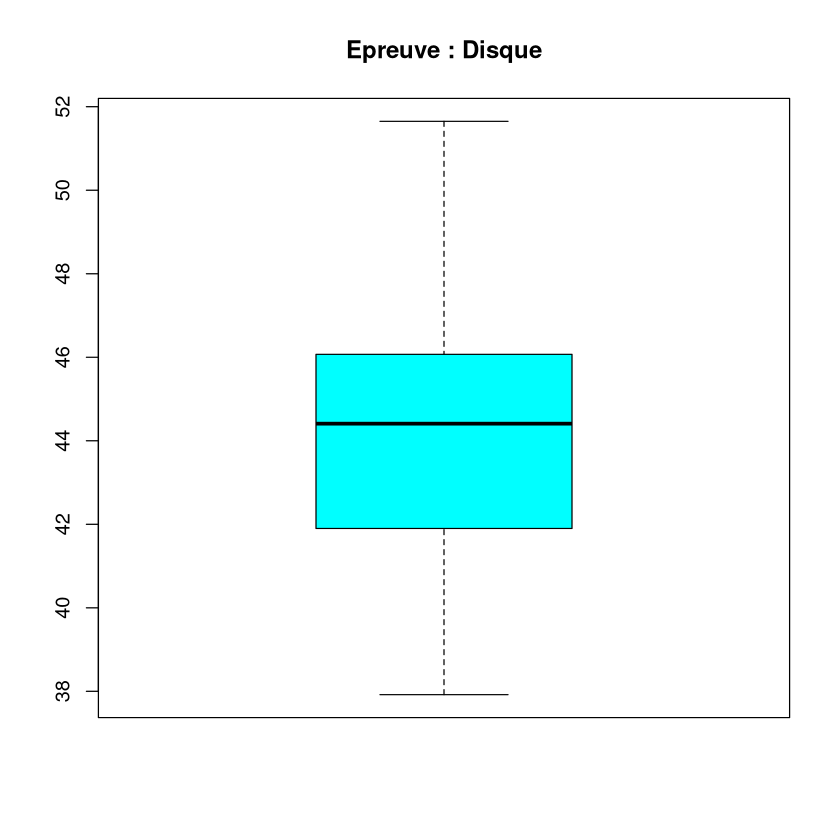

In [52]:
boxplot(df$Disque, col ='cyan', main = "Epreuve : Disque")

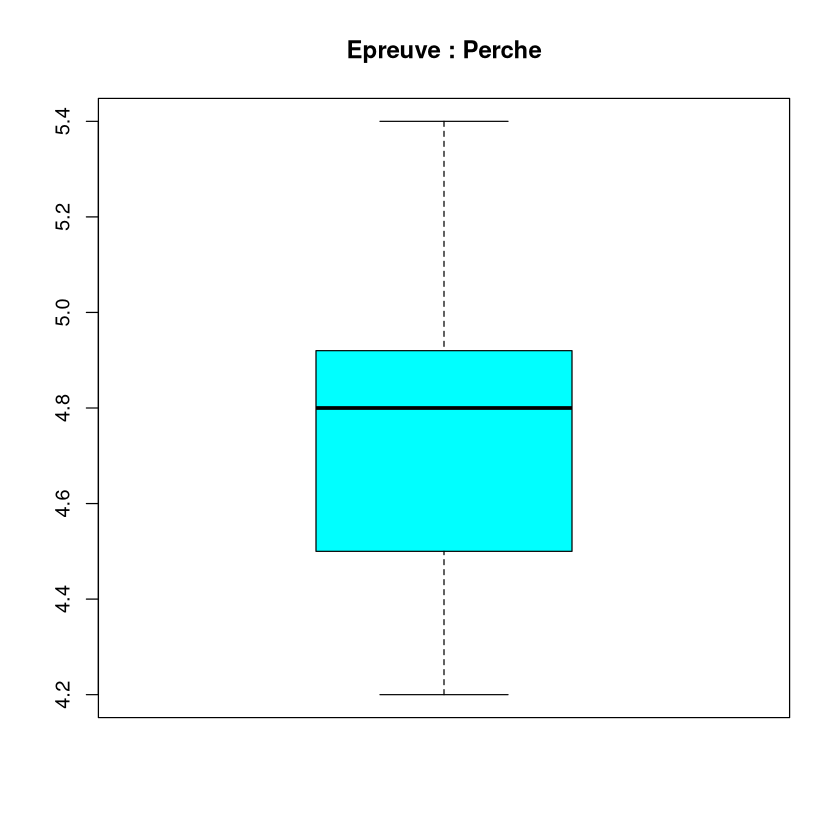

In [53]:
boxplot(df$Perche, col ='cyan', main = "Epreuve : Perche")

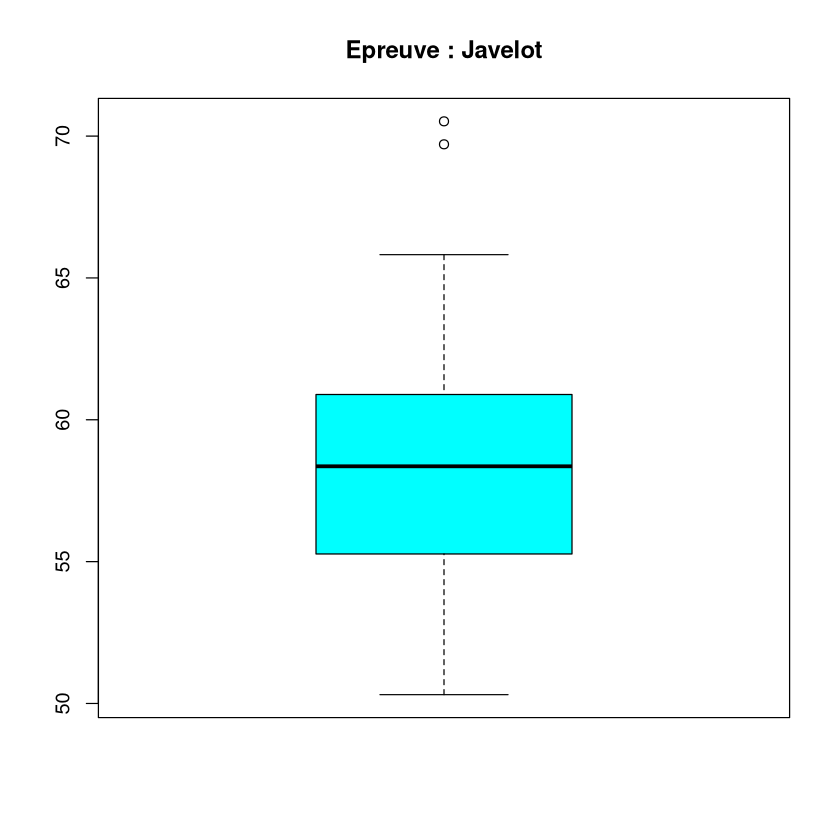

In [54]:
boxplot(df$Javelot, col ='cyan', main = "Epreuve : Javelot")

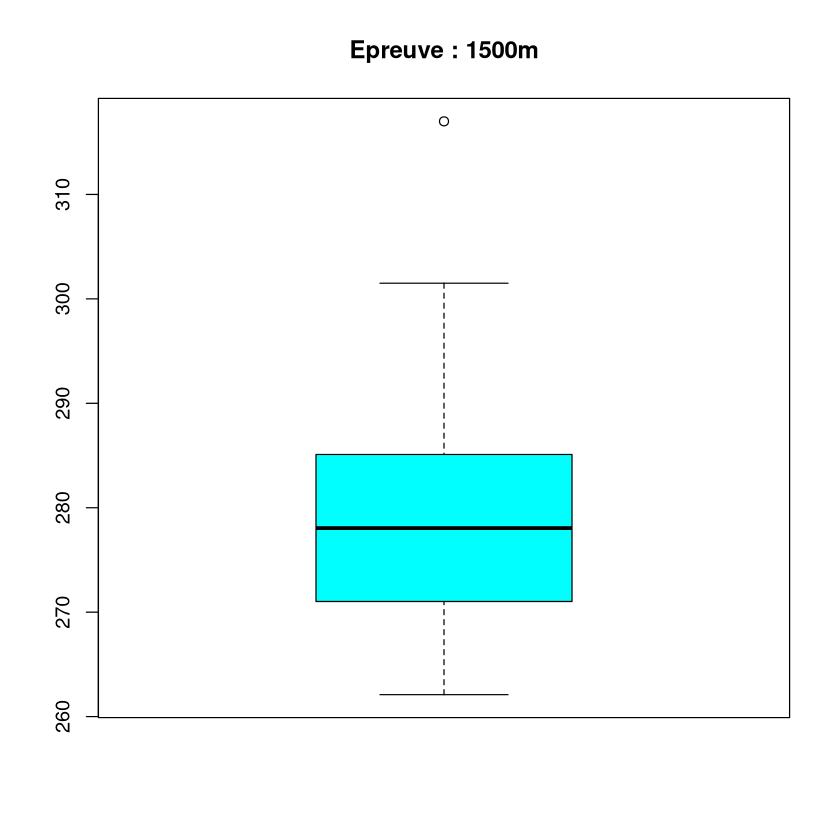

In [55]:
boxplot(df$X1500m, col ='cyan', main = "Epreuve : 1500m")

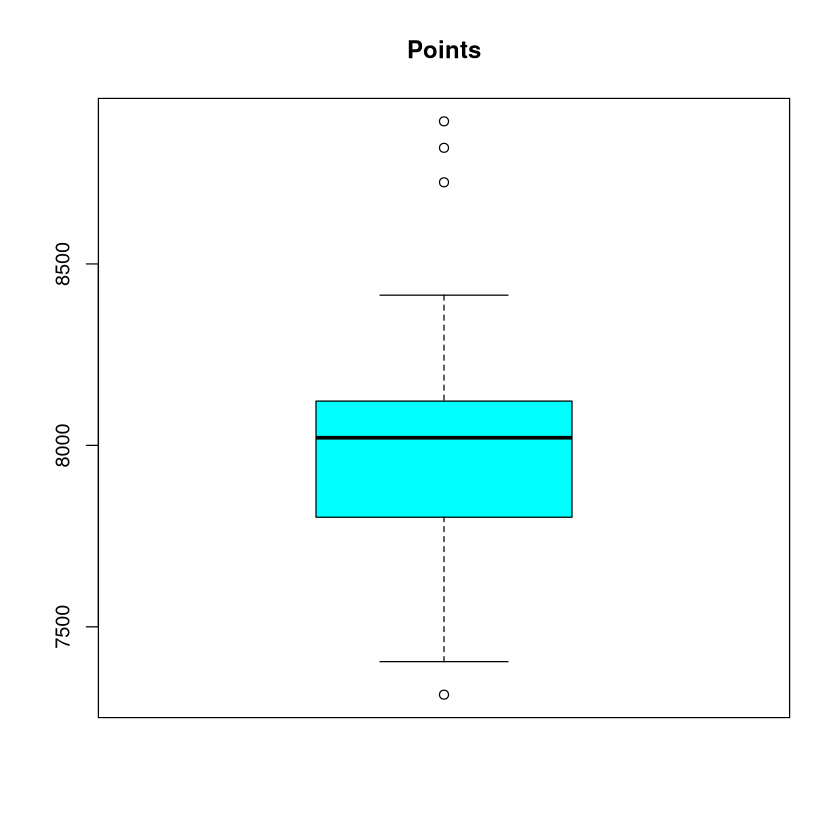

In [56]:
boxplot(df$Points, col ='cyan', main = "Points")

Grace aux boxplots, il est possible de mieux comprendre la dispersion de nos données dans les différentes colonnes.\
On voit ici comme avec le `summary` que la plupart des données ne présentent pas d'anomalies. Les seules données qui pourraient soulever des questions sont dans le **400m**, le **javelot** ou le **1500m**, mais celles-ci restent dans des normes tout à fait acceptable.

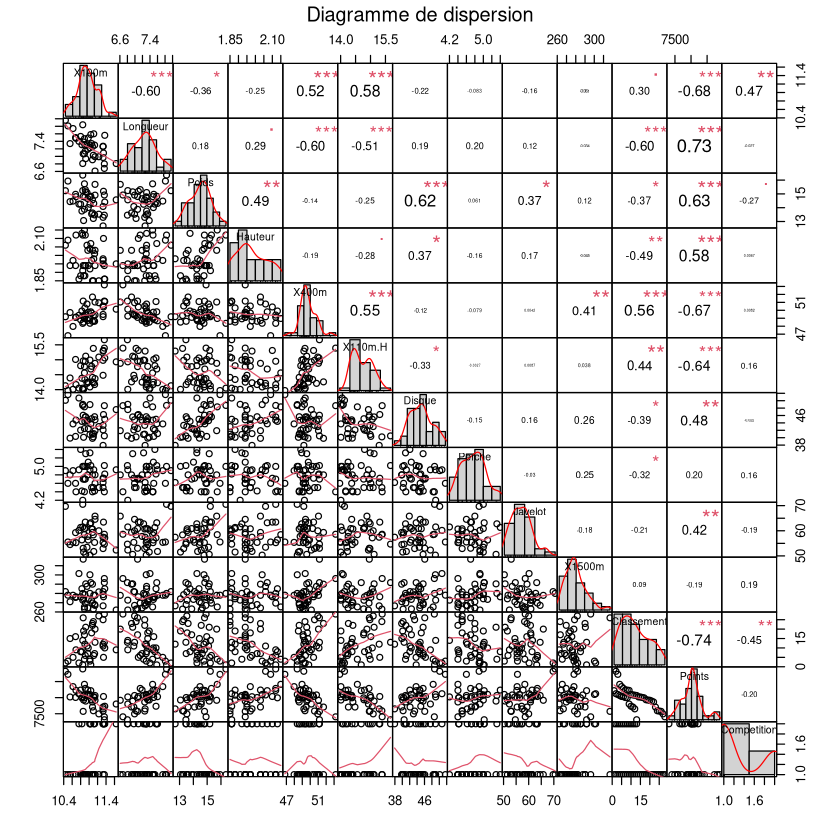

In [57]:
options(warn=-1)
chart.Correlation(df, pch = 19)
mtext("Diagramme de dispersion", side = 3, line = 3)

On retrouve ici le **Diagramme de dispersion** appliqué sur nos données ainsi que les valeurs de corrélations entre les différentes colonnes.

Il est notamment assez utile pour retrouver des applications linéaires entre les colonnes de nos données.

Nos observations sont les suivantes :
- La ligne de la colonne `Points` est linéairement corrélée à toutes les autres variables, que ce soit négativeme|nt ou positivement. Cela est logique puisque plus le résultats d'une épreuve est élevé (ou faible si c'est une course) plus le nombre de points est élevé aussi.
- On remarque que la valeur de l'épreuve `Poids` est fortement corrélée a celle de l'épreuve `Disque`.

---

## ACP

On va maintenant effectuer une **ACP** (Analyse en Composantes Principales).\
   
Celle-ci nous permet d’analyser et de visualiser notre jeu de données `Decathlon` qui contient des individus décrits par plusieurs variables quantitatives.

L'**ACP** est une méthode qui nous permet d’explorer des données avec plusieurs variables. Chaque variable pourrait être considérée comme une dimension différente. Cela est utile car il pourrait être très difficile de visualiser nos données dans une “hyper-espace” multidimensionnelle.

L’analyse en composantes principales est utilisée pour extraire et de visualiser les informations importantes contenues dans une table de données multivariées. L’**ACP** synthétise cette information en seulement quelques nouvelles variables appelées composantes principales. Ces nouvelles variables correspondent à une combinaison linéaire des variables originels. Le nombre de composantes principales est inférieur ou égal au nombre de variables d’origine.

L’information contenue dans un jeu de données correspond à la variance ou l’inertie totale qu’il contient. L’objectif de l’**ACP** est d’identifier les directions (les axes principaux ou composantes principales) le long desquelles la variation des données est maximale.

En d’autres termes, l’**ACP** réduit les dimensions d’une donnée multivariée à deux ou trois composantes principales, qui peuvent être visualisées graphiquement, en perdant le moins possible d’information.

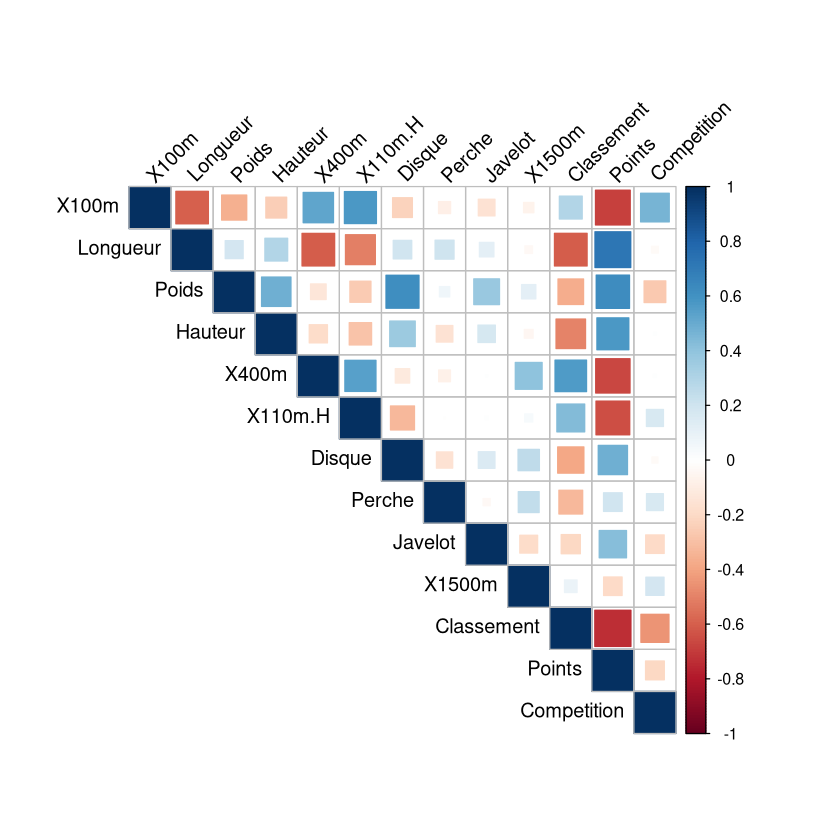

In [58]:
matrice_cor = cor(df)
corrplot(matrice_cor, type="upper", order="original", tl.col="black", tl.srt=45, method = "square")

On confirme nos observations précédentes dans ce graphe de corrélation.  

On peut ajouter que :
- les résultats des épreuves de courses courtes, donc `X100m`, `X400m` et `X110m.H`, sont fortement corrélés entre elles. Assez étonnamment elles sont cependant négativement corrélées avec le classement final, contrairement aux épreuves de `Longueur`, `Poids` et `Hauteur`.
- l'épreuve de `Longueur` et celle du `X400m` sont assez fortement négativement corrélées.

#### Scaling des données

Pour passer aux étapes suivantes, il est nécessaire de normaliser nos données, ce qui est fait avec la fonction `scale` et qui nous permet d'obtenir un dataset normalisé.

In [59]:
df_scaled = scale(df[1:10], center = TRUE, scale = TRUE)
df_scaled = cbind(df_scaled, df[c("Classement", "Points", "Competition")])

In [60]:
head(df_scaled)

,X100m,Longueur,Poids,Hauteur,X400m,X110m.H,Disque,Perche,Javelot,X1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
Sebrle,-0.5628739,1.8331131,2.283919585,1.60955474,-1.0892025,-1.17818270,1.3009450,0.8545364,2.52825135,0.08439142,1,8893,1
Clay,-2.1216730,2.2123779,0.913271989,0.93502243,-0.3696226,-1.00861538,1.7124500,0.4948240,2.36043901,0.25486670,2,8820,1
Karpov,-1.8935560,1.7382969,1.762345721,1.27228858,-2.4329962,-1.34775002,2.1683620,-0.5843134,-0.57524110,-0.07837391,3,8725,1
Macey,-0.4107959,0.6637134,1.519753226,1.94682089,-0.5603546,-0.09719103,1.1884472,-1.3037383,0.02971203,-1.16547502,4,8414,1
Warners,-1.4373221,1.5170591,0.003550134,-0.07677604,-1.4273183,-1.26296636,-0.1763283,0.4948240,-0.60631746,-0.08351387,5,8343,1
Zsivoczky,-0.3347570,-0.3792648,1.010308987,1.60955474,-0.1875602,0.72944966,0.3832000,-0.2246009,1.06351893,-0.81253124,6,8287,1


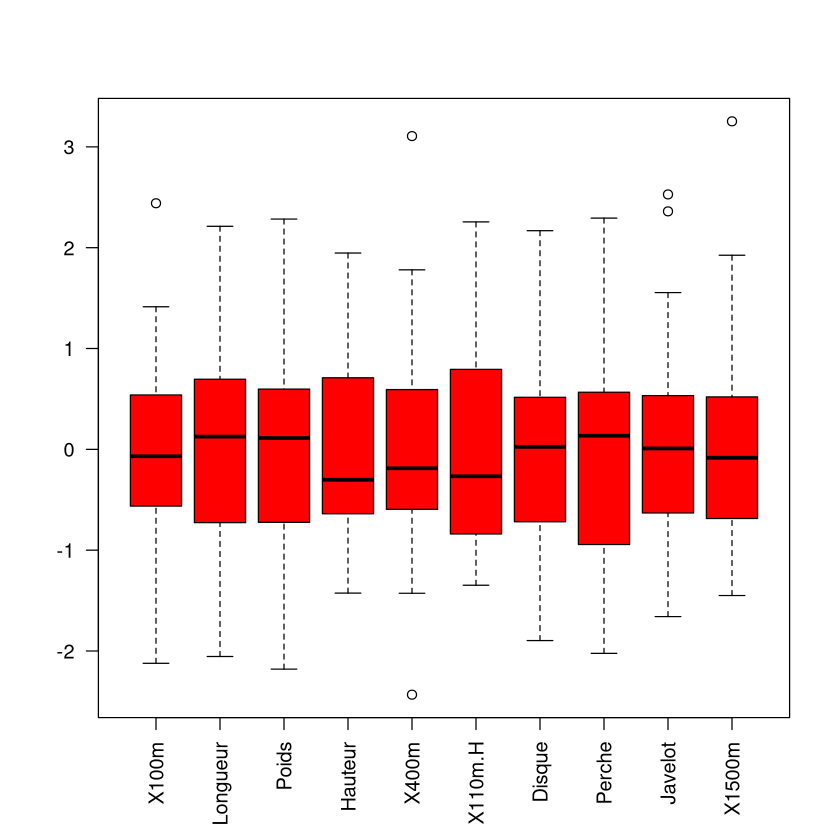

In [61]:
boxplot(df_scaled[1:10], col = 'red', las=2)

On observe par ces boxplots que les données sont bien normalisées. 

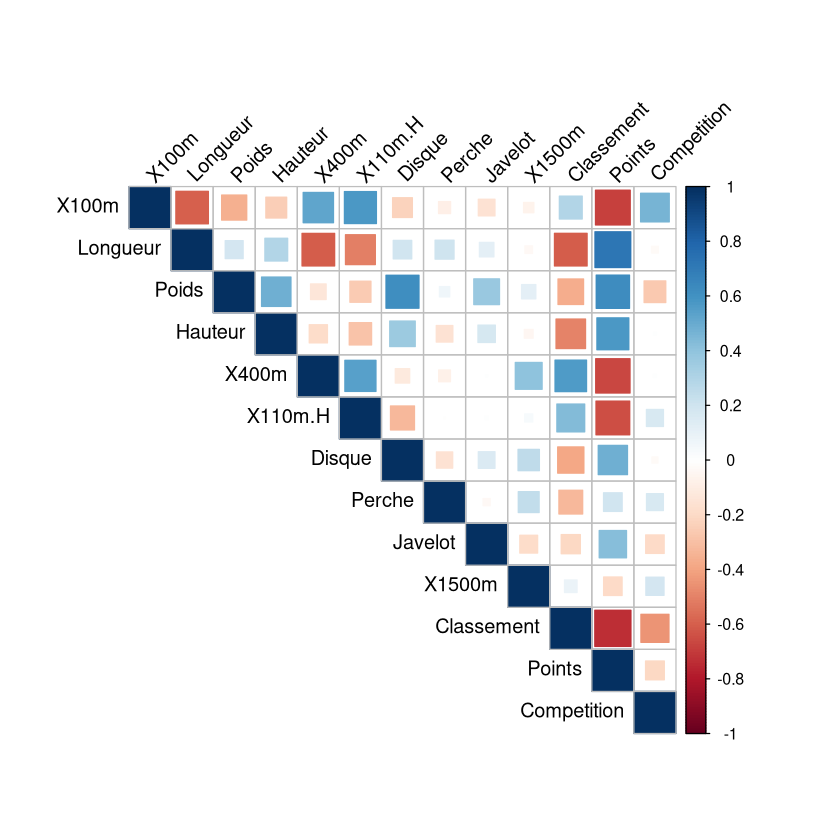

In [62]:
matrice_cor = cor(df_scaled)
corrplot(matrice_cor, type="upper", order="original", tl.col="black", tl.srt=45, method = "square")

On observe que la normalisation des données n'impacte pas la corrélation. 

#### Réalisation de l'ACP

On effectue ici l'ACP avec la fonction prcomp().

In [63]:
res_acp = prcomp(df_scaled[1:10], scale = FALSE)
res_acp

Standard deviations (1, .., p=10):
 [1] 1.8088409 1.3180027 1.1852918 1.0280323 0.8275104 0.7741245 0.6717405
 [8] 0.6299814 0.4634812 0.4268811

Rotation (n x k) = (10 x 10):
                 PC1        PC2         PC3         PC4         PC5         PC6
X100m     0.42829627  0.1419891 -0.15557953 -0.03678703 -0.36518741  0.29607739
Longueur -0.41015201 -0.2620794  0.15372674  0.09901016 -0.04432336 -0.30612478
Poids    -0.34414444  0.4539470 -0.01972378  0.18539458 -0.13431954  0.30547299
Hauteur  -0.31619436  0.2657761 -0.21894349 -0.13189684 -0.67121760 -0.46777116
X400m     0.37571570  0.4320460  0.11091758  0.02850297  0.10597034 -0.33252178
X110m.H   0.41255442  0.1735910 -0.07815576  0.28290068 -0.19857266 -0.09963776
Disque   -0.30542571  0.4600244  0.03623770 -0.25259074  0.12667770  0.44937288
Perche   -0.02783081 -0.1368411  0.58361717  0.53649480 -0.39873734  0.26166458
Javelot  -0.15319802  0.2405071 -0.32874217  0.69285498  0.36873120 -0.16320268
X1500m    0.03210733  0.

In [64]:
get_eigenvalue(res_acp)

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,3.2719055,32.719055,32.71906
Dim.2,1.7371310,17.371310,50.09037
Dim.3,1.4049167,14.049167,64.13953
Dim.4,1.0568504,10.568504,74.70804
Dim.5,0.6847735,6.847735,81.55577
Dim.6,0.5992687,5.992687,87.54846
Dim.7,0.4512353,4.512353,92.06081
Dim.8,0.3968766,3.968766,96.02958
Dim.9,0.2148149,2.148149,98.17773


On récupere ici les valeurs propres suite a notre ACP qui représentent la quantité de variance expliquée par chaque composante principale.

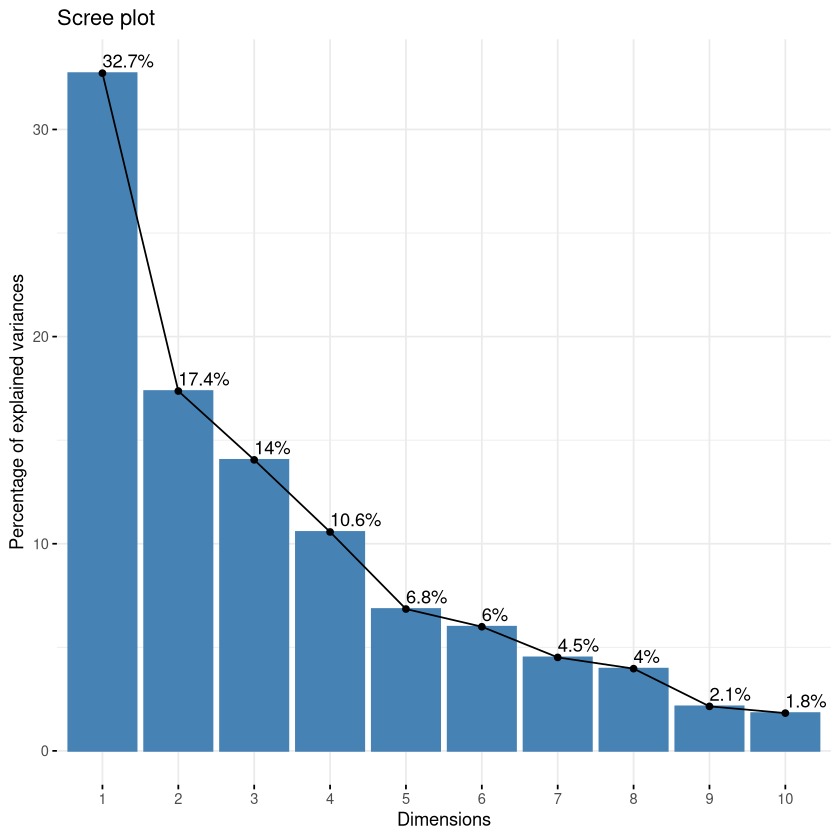

In [65]:
fviz_eig(res_acp, addlabels = TRUE)

Ici on visualise les **valeurs propres**. Cela montre le pourcentage de variances expliquées par chaque
axe principal. 

Cette méthode nous permet de déterminer le nombre de **composantes principales** qui expliquent le maximum d'information. Le nombre d’axes est déterminé par le point, au-delà duquel les valeurs propres restantes sont toutes relativement petites et de tailles comparables.  

Du graphique ci-dessus, nous pourrions vouloir nous arrêter à la cinquième composante principale. 81,5% des informations (variances) contenues dans les données sont conservées par les cinq premières composantes principales.

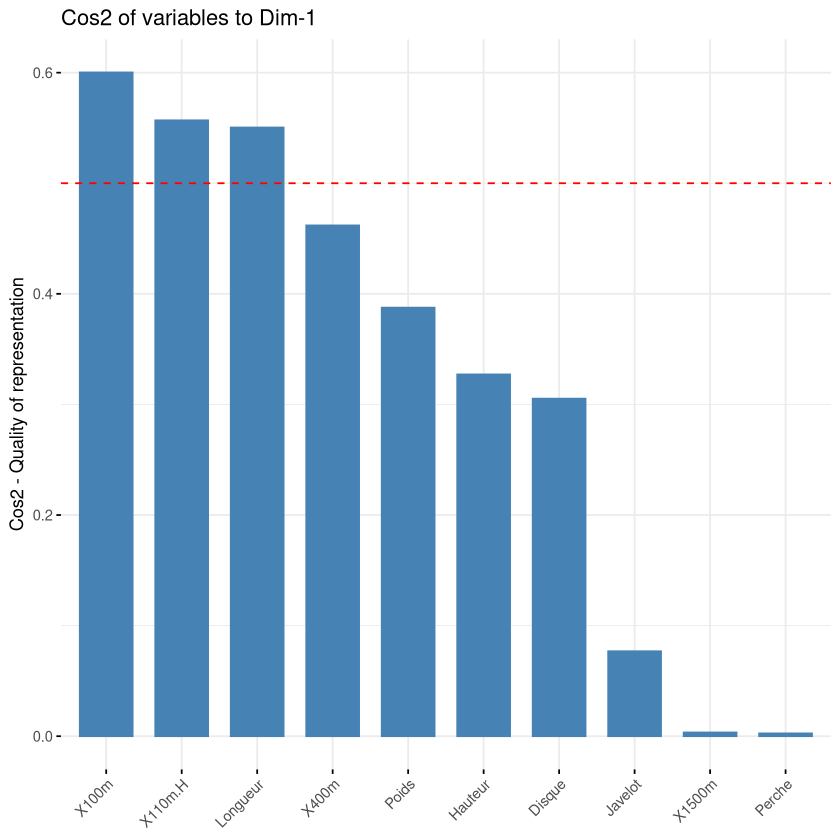

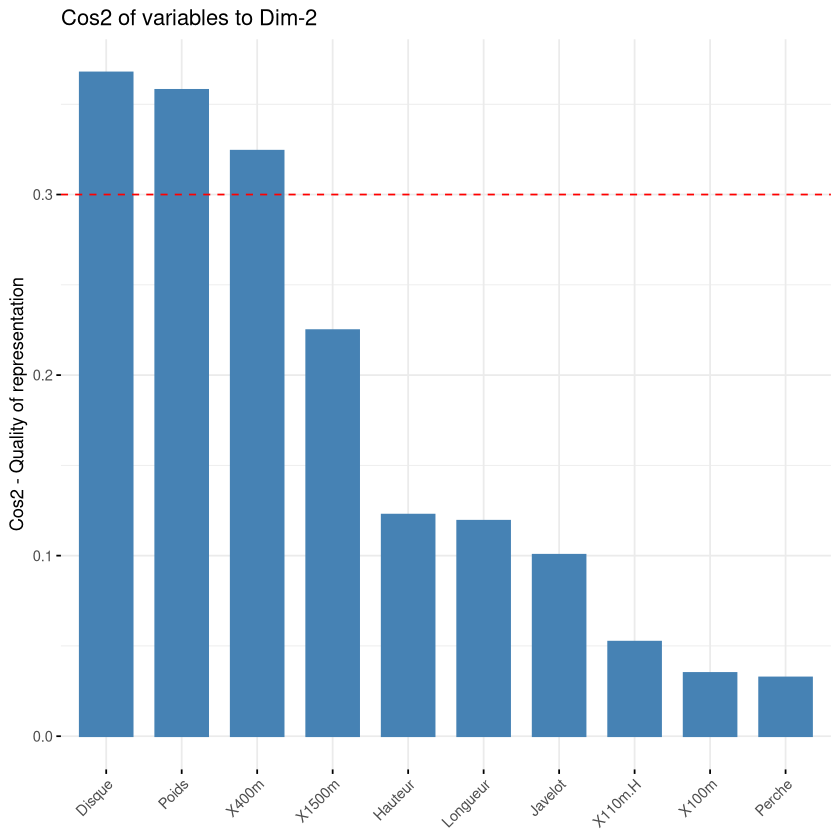

In [75]:
fviz_cos2(res_acp, choice="var", axes=1) +
geom_hline(yintercept = 0.5, linetype = 2, color = "red")
fviz_cos2(res_acp, choice="var", axes=2)+
geom_hline(yintercept = 0.3, linetype = 2, color = "red")

Ici on réalise la visualisation du **Cos2** de nos variables selon les dimensions 1 et 2.  
Faire cette représentation nous permet de comparer la qualité de représentation de nos variables selon nos
deux axes. Ici nous avons posé un seuil (le trait pointillé rouge) de 50% et 30% de qualité de représentation.

On peut donc voir que certaines variables sont bien représentées sur une dimension et beaucoup moins
sur une autre, c’est par exemple le cas des épreuves du `X100m` ou `Longueur`.

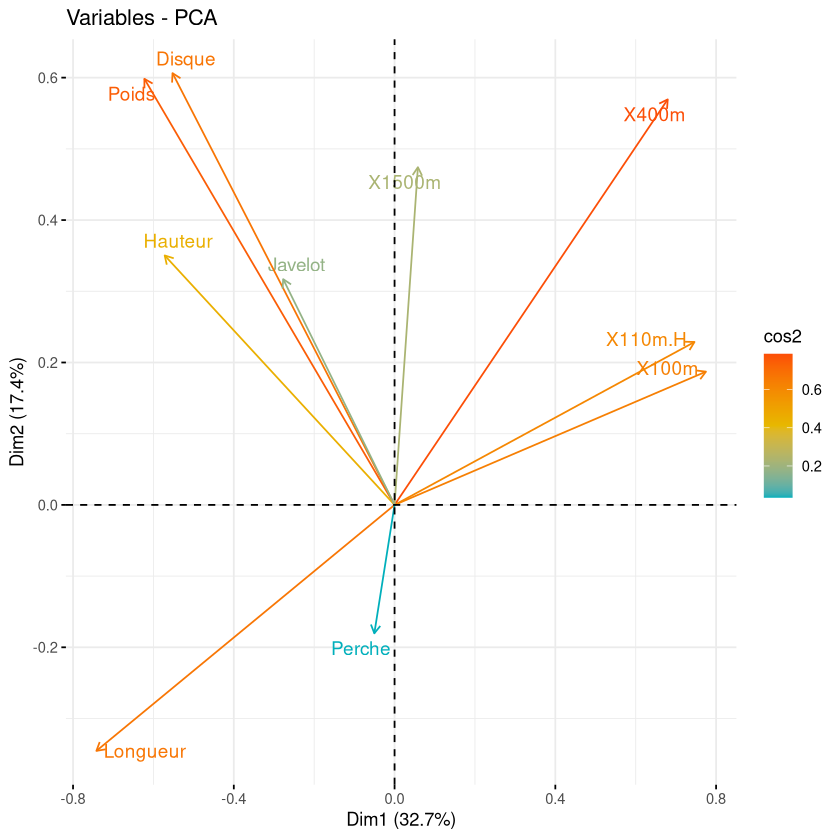

In [76]:
# Colorer en fonction du cos2: qualité de représentation
fviz_pca_var(res_acp, col.var = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE
)

Cette représentation sur l’axe factoriel nous permet de bien remarquer la qualité de représentation
de nos variables.  
On doit ici interpréter les axes de facon indépendante.

On peut analyser plusieurs éléments :
- Les variables positivement corrélées sont regroupées.
- Les variables négativement corrélées sont positionnées sur les côtés opposés de l’origine du graphique (quadrants opposés).
- La distance entre les variables et l’origine mesure la qualité de représentation des variables. Les variables qui sont loin de l’origine sont bien représentées par l’ACP.

Par exemple, les épreuves de lancer, soit `Poids`, `Disques` et `Javelot`, sont fortement corrélées car pointent dans la meme direction. Cepandant, `Javelot` est moins bien représenté que `Poids` et `Disques` dans les deux premières composantes principales.

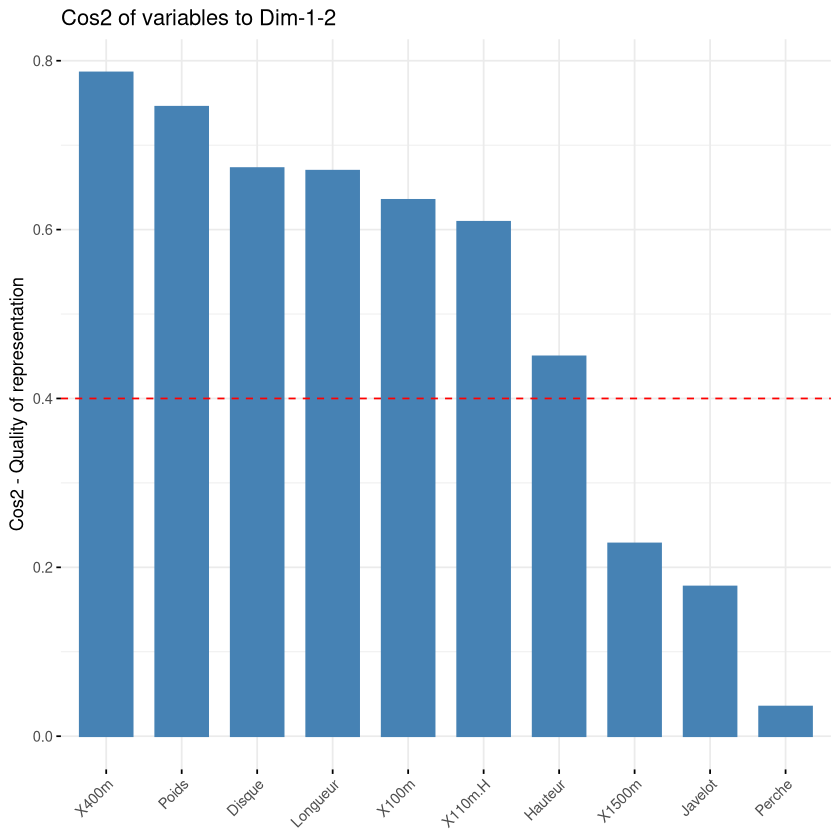

In [79]:
fviz_cos2(res_acp, choice="var", axes=1:2) +
geom_hline(yintercept = 0.4, linetype = 2, color = "red")

Ici on observe la qualité de représentation de nos variables avec les deux dimensions en meme temps.  

On remarque alors que `Javelot`, `X1500m` et `Perche` sont très mal représentés et ne nous permettront pas d’analyser correctement nos données.

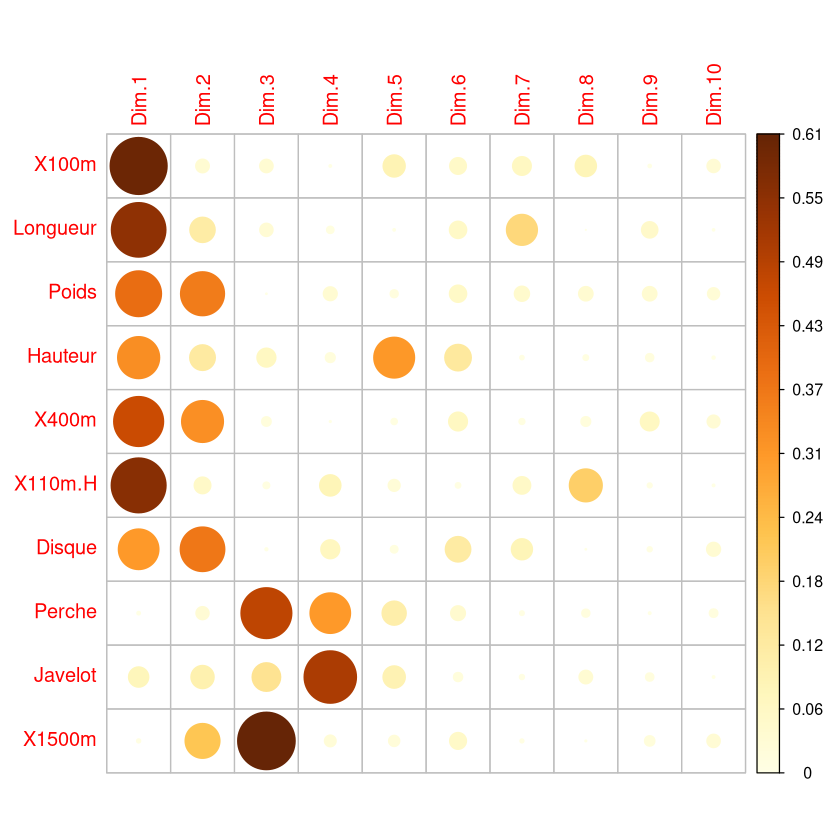

In [69]:
var <- get_pca_var(res_acp)
corrplot(var$cos2, is.corr=FALSE)

Le graphique ci-dessus indique la répartition de nos variables dans les différentes composantes principales.

On remarque par exemple que nos trois variables `Perche`, `Javelot` et `X1500m` qui sont mal expliquées dans nos deux premieres composantes, se retrouvent principalement dans les composantes 3 et 4. 

#### Biplot

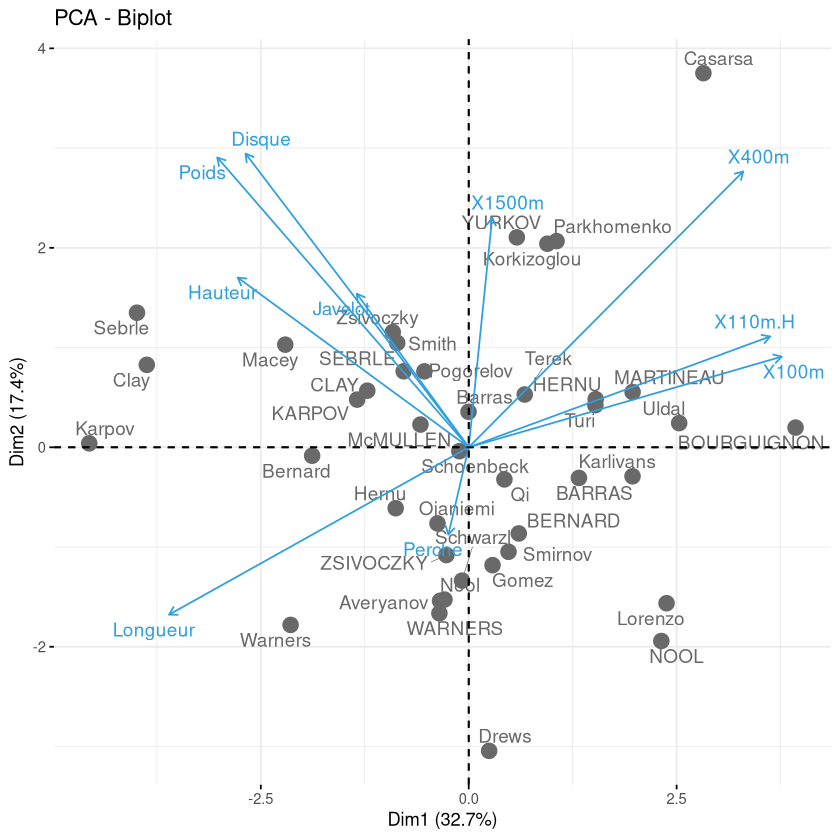

In [70]:
 fviz_pca_biplot(res_acp, repel = TRUE,
select.ind = list(name=rownames(df_scaled)),
col.var = "#2E9FDF", # Couleur des variables
col.ind = "#696969", # Couleur des individues
pointsize = 4
)

Grace au biplot, on peut voir la projection de nos individus dans la représentation sur l'axe factoriel de nos deux premieres composantes principales.

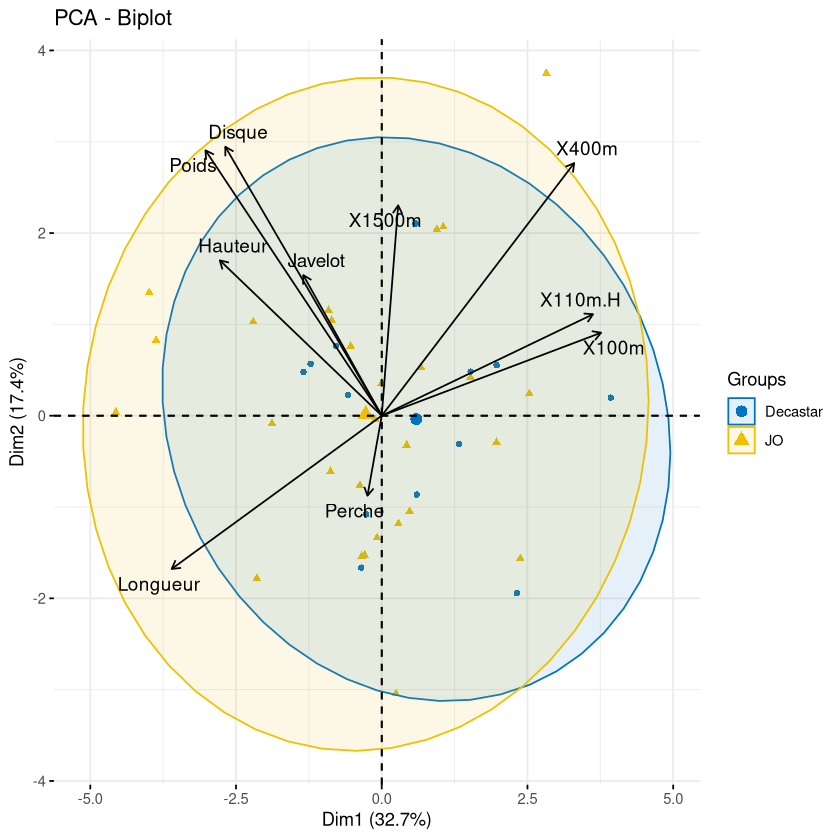

In [71]:
df_scaled[1:28, 13] = "JO"
df_scaled[29:41, 13] = "Decastar"
df_scaled$Competition = as.character(df_scaled$Competition)

fviz_pca_biplot(res_acp,
col.ind = df_scaled$Competition, palette = "jco",
addEllipses = TRUE, label = "var",
col.var = "black", repel = TRUE,
legend.title = "Groups")

Ce nouveau biplot nous permet d'observer la répartition des individus en fonction de leur compétition.

On observe ici assez bien les différences entre les JO et le Decastar sur les scores :
- le Decastar comprend des candidats qui semblent plus performant sur les épreuves de courses (`X110m.H`, `X100m`)
- les Jeux Olympiques ont des candidats bon dans l'ensemble des épreuves, notamment sur le `Poids`, le `Disque` ou la `Longueur`.

---

## Régression logistique

***Quels sont les variables explicatives ?***  
Les variables explicatives seront les épreuves suivantes : `X400m`, `Poids`, `Disque`, `Longueur` et `X100m`.

***Quelle est la variable que l’on cherche à expliquer ?***  
La variable que l'on cherche a expliquer ici est `Points`.  

On applique donc la régression logistique (`Points` ~ `X400m`, `Poids`, `Disque`, `Longueur` et `X100m`).

In [80]:
model = glm(df_scaled$Points ~ df_scaled$X400m + df_scaled$Poids + df_scaled$Disque + df_scaled$Longueur + df_scaled$X100m)

In [81]:
pander(summary(model))



|         &nbsp;         | Estimate | Std. Error | t value | Pr(>|t|)  |
|:----------------------:|:--------:|:----------:|:-------:|:---------:|
|    **(Intercept)**     |   8005   |   20.85    |   384   | 4.938e-65 |
|  **df_scaled$X400m**   |  -105.5  |   27.33    |  -3.86  | 0.0004676 |
|  **df_scaled$Poids**   |  140.7   |   28.13    |  5.002  | 1.597e-05 |
|  **df_scaled$Disque**  |  31.97   |     27     |  1.184  |  0.2444   |
| **df_scaled$Longueur** |  124.1   |   29.32    |  4.234  | 0.0001578 |
|  **df_scaled$X100m**   |  -47.85  |   28.73    | -1.665  |  0.1048   |


(Dispersion parameter for  gaussian  family taken to be  17816.38 )


|                    |                                    |
|:------------------:|:----------------------------------:|
|   Null deviance:   | 4689104  on 40  degrees of freedom |
| Residual deviance: | 623573  on 35  degrees of freedom  |



Ici la t value est la t-statistique, qui est le coefficient estimé (la colonne 2) divisé par l'erreur standard.  
Pr(>|t|) est la **p-value** correspondante a la t-statistique, plus la p-value est petite, plus le coefficient estimé est important.

On remarque que la **p-value** est inférieur au seuil de 10% pour certaines des variables explicatives.

En effet,
- il existe une relation significative entre les `Points` et l'épreuve du `X400m` (0.0004676)
- il existe une relation significative entre les `Points` et l'épreuve du `Poids` (1.597e-05)
- il existe une relation significative entre les `Points` et l'épreuve du `Longueur` (0.0001578)
- on ne peut pas conclure qu'il existe une relation significative entre les `Points` et l'épreuve du `Disque` (0.2444) car le seuil de 10% est dépassé.
- on ne peut pas conclure qu'il existe une relation significative entre les `Points` et l'épreuve du `X100m` (0.1048) car le seuil de 10% est dépassé de peu.

Probabilité du `Classement` en fonction du nombre de `Points` :

In [82]:
d <- df_scaled[df_scaled$Points > 8000,]
prop.table(table(d$Classement))


         1          2          3          4          5          6          7 
0.08695652 0.08695652 0.08695652 0.08695652 0.08695652 0.08695652 0.08695652 
         8          9         10         11         12         13         14 
0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 
        15         16 
0.04347826 0.04347826 